In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from esem.utils import plot_results, prettify_plot, add_121_line, leave_one_out
from esem import rf_model, gp_model, cnn_model
from sklearn.metrics import mean_squared_error
from scipy import stats

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

2022-02-16 09:34:24.134208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-16 09:34:24.134257: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Define a dataset with 100 samples

In [2]:
# Size of dataset
n_sample = 100

# Build dataset
x1 = np.random.uniform(low=0.0, high=10, size=n_sample)
x2 = np.random.uniform(low=0.0, high=10, size=n_sample)
X = np.transpose(np.stack([x1, x2]))
Y = 2 * X[:,0] +  3 * X[:,1]

# Build testing and training dataset
inds_test = np.arange(0, int(n_sample/5))
inds_train = np.arange(int(n_sample/5), n_sample)

# Define training data set

In [3]:
X_train = X[inds_train, :]
Y_train = Y[inds_train]

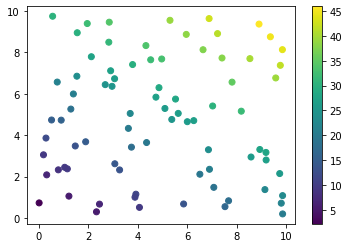

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.colorbar()

# Train model

In [5]:
%%time
rf_model = rf_model(X_train, Y_train)
rf_model.train()

CPU times: user 149 ms, sys: 12.2 ms, total: 161 ms
Wall time: 333 ms


2022-02-16 09:34:29.644376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-16 09:34:29.644412: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-16 09:34:29.644438: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shas0135.rc.int.colorado.edu): /proc/driver/nvidia/version does not exist
2022-02-16 09:34:29.644832: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
%%time
gp_model = gp_model(X_train, Y_train)
gp_model.train()

2022-02-16 09:34:31.311771: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


CPU times: user 2.4 s, sys: 153 ms, total: 2.55 s
Wall time: 5.52 s


# Build a testing dataset

In [7]:
X_test = X[inds_test, :]

# Inference

In [8]:
%%time
Y_rf_test = rf_model.predict(X_test)[0]

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 26 ms


In [9]:
%%time
Y_gp_test = gp_model.predict(X_test)[0]

CPU times: user 45.5 ms, sys: 0 ns, total: 45.5 ms
Wall time: 84.5 ms


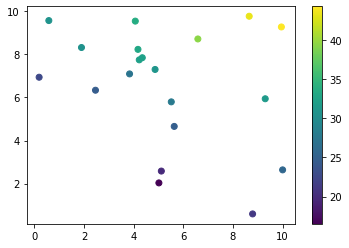

In [10]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_rf_test)
plt.colorbar()

# Perform analysis

In [11]:
def calc_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

Text(0.5, 1.0, 'Slope = 0.8382065169361821\nR^2 = 0.9617868853208656,\np = 3.2793560910344034e-14,\nRMSE = 2.000227449914502,\nN = 100')

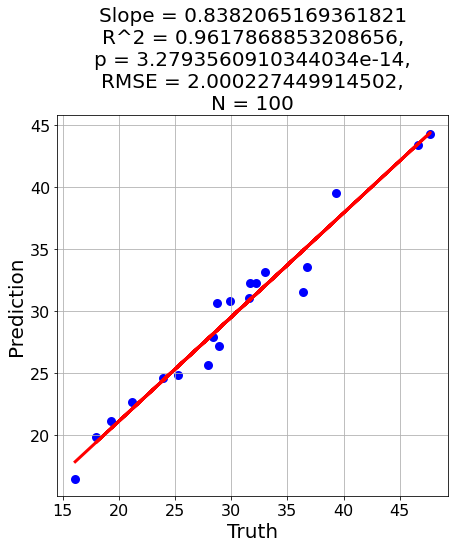

In [12]:
# Random Forest 
x = Y[inds_test] # Truth
y = Y_rf_test # Prediction
lin_reg = stats.linregress(x, y)
rmse = calc_rmse(y, x)

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='b', linewidth=3)
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line', linewidth=3)
plt.grid()
plt.xlabel("Truth", fontsize=20)
plt.ylabel("Prediction", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Slope = " + str(lin_reg.slope) + \
          "\nR^2 = " + str(lin_reg.rvalue**2) + \
          ",\np = " + str(lin_reg.pvalue) + \
          ",\nRMSE = " + str(rmse) + \
          ",\nN = " + str(n_sample),
         fontsize=20)

Text(0.5, 1.0, 'Slope = 0.9999999999771578\nR^2 = 1.0,\np = 9.49609375000032e-179,\nRMSE = 1.1199316037587622e-09,\nN = 100')

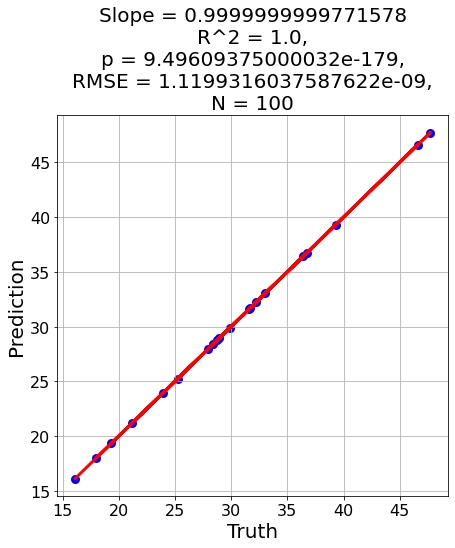

In [13]:
# Gaussian processes
x = Y[inds_test] # Truth
y = Y_gp_test # Prediction
lin_reg = stats.linregress(x, y)
rmse = calc_rmse(y, x)

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='b', linewidth=3)
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line', linewidth=3)
plt.grid()
plt.xlabel("Truth", fontsize=20)
plt.ylabel("Prediction", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Slope = " + str(lin_reg.slope) + \
          "\nR^2 = " + str(lin_reg.rvalue**2) + \
          ",\np = " + str(lin_reg.pvalue) + \
          ",\nRMSE = " + str(rmse) + \
          ",\nN = " + str(n_sample),
         fontsize=20)